# Justin Butler : AAE 439 - HW3

This assignment was created in a Jupyter notebook and exported via $\LaTeX$

In [38]:
"""
This first code block contains all of the functions and imports for the 
rest of the assignment.These functions will be called throughout the assignment

"""

import numpy as np
import matplotlib.pyplot as plt
import decimal
%matplotlib inline

def rounds(item):
    ret = float('%.3f'% (item * 1000/1000))
    return(ret)
def findMachSup(rat):
    mGuess = 1
    i = 0
    ratGuess = 0
    while ratGuess < rat:
        if i!= 0:
            mGuess += 0.001
        ratGuess = ((1/mGuess)*((2+(gamma-1)*mGuess**2)/(gamma+1))
                    **((gamma+1)/(2*(gamma-1))))
        #print(ratGuess)
        i += 1
        if i > 100000:
            print("Method did not converge in one hundred thousand iterations")
            print("Ending loop")
            break
    return(mGuess)
def findMachSub(rat):
    mGuess = 1
    i = 0
    ratGuess = 0
    while ratGuess < rat:
        if i!= 0:
            mGuess -= 0.001
        ratGuess = ((1/mGuess)*((2+(gamma-1)*mGuess**2)/(gamma+1))
                    **((gamma+1)/(2*(gamma-1))))
        #print(ratGuess)
        i += 1
        if i > 100000:
            print("Method did not converge in one hundred thousand iterations")
            print("Ending loop")
            break
    return(mGuess)
def areaRat(M):
    ratio = ((1/M)*((2+(gamma-1)*M**2)/(gamma+1))
                    **((gamma+1)/(2*(gamma-1))))
    return(ratio)
def totalPres(Ps, M):
    total = Ps * ((1+((gamma-1)/2)*M**2)**(gamma/(gamma-1)))
    return(total)
def statPres(Pt, M):
    static = Pt / ((1+((gamma-1)/2)*M**2)**(gamma/(gamma-1)))
    return(static)
def DRC(angle):
    radian = angle * (np.pi/180)
    return(radian)
def RDC(angle):
    degree = angle * (180/np.pi)
    return(degree)
def numericalDerivative3(x,y):
    #Left handed derivative: 3 values needed
    h = np.abs(x[1]-x[2])
    yPrime = (1/(2*h))*(y[0] - 4*y[1] + 3*y[2])
    return(yPrime)
def parabolaSolveOrigin(x,y):
    #|x| = 2, |y| = 2
    b = ((y[1]*x[0]**2 - y[0]*x[1]**2)/(x[1]*x[0]**2 - x[0]*x[1]**2))
    a = ((y[0]-b*x[0])/(x[0]**2))
    c = 0
    return([a,b,c])
def rot90(x,y):
    newX = y
    newY = -x
    return([newX,newY])
def rot270(x,y):
    newX = -y
    newY = x
    return([newX,newY])

In [42]:
findMachSub(20)

0.027999999999999137

## Problem 1

## Problem 2

#### Iterative Approach


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [54]:
decimal.getcontext().rounding = decimal.ROUND_DOWN
gamma = 1.4
Pc0 = 1# * 101.325 #Kilopascals per atm
Pe = 0.5# * 101.325
AeAt = 3 #Ae/At

#starting guess for area ratio
AeAn = np.linspace(0.8,3,100)
AnAt = [((item)**(-1) * 3) for item in AeAn]

#Find mach function
mach = [findMachSup(item) for item in AnAt]
P1P01 = [(1+((gamma-1)/2)* item**2)**((-gamma)/(gamma-1)) for item in mach]
P2P1 = [(1+((2*gamma)/(gamma+1))*(item**2-1)) for item in mach]
mach2 = [((1 + ((gamma-1)/2)*item**2)/(gamma*item**2 - ((gamma-1)/2)))**
         (1/2) for item in mach]
P02P2 = [(1+((gamma-1)/2)*item**2)**(gamma/(gamma-1)) for item in mach2]
AeA2star = [AeAt * (AnAt[i])**(-1) * areaRat(mach2[i]) for i in range(len(AnAt))]
machE = [findMachSub(item) for item in AeA2star]
PeP0e = [(1+ ((gamma-1)/2)*item**2)**(-gamma/(gamma-1)) for item in machE]

#print(PeP0e)


print("Smallest P_e as calculated through iterative method:\n" + str(rounds(PeP0e[0])) + " atm")
print("P_e needed to find location of normal shock:\n" + str(Pe) + " atm")

Smallest P_e as calculated through iterative method:
0.725 atm
P_e needed to find location of normal shock:
0.5 atm


#### Direct Method

## Problem 4

From the code file below, we have created the contour of the ideal nozzle usisng the method developed by Rao(1958). This method utilized numerical differentiation, parabola definition, and area relations.

Below this, we give our plots of Mach and Pressure over the contour. These plots were generated using the "findMach" function defintion above - which is an application of Newton's method.

In [34]:
P_c = 3*10**3 #kPa
P_a = 0.1 *10**3 #kPa
F = 100 #KN
c_star = 1500 #m/s
gamma = 1.2
R_wtu = 0.8
R_wtd = 0.8
eps = 15
contract = 3.5
theta_i = DRC(45) #radians
theta_d = DRC(15) #radians
R_i = 0.5

#for eps = 15 and gamma = 1.2
M_e = 3.560 #mach
P_eP_c = 0.0073636 #ratio
c_fv = 1.79002 #vacuum Cf

## Finding area of throat ##
c_f = c_fv - (P_a/P_c)*eps
A_t = F/(c_f * P_c)
print("area of throat| " + str(rounds(A_t)) + " sq meters")

"""
If we take the center of the throat to be our origin for this plot,
and given the area we just found, we can now find the coordinate of
the top of the throat. From that value we can begin to plot out
the rest of the contour.
"""
## Radius and coordinate of throat ##
r_t = np.sqrt(A_t/np.pi)
print("radius of throat| " + str(rounds(r_t)) + " meters")

## Radius of circular arc going out to the nozzle ##
r_wtd = r_t * R_wtd

## Generating wtd arc ##
theta = np.linspace((3*np.pi/2),theta_d + (3*np.pi/2), 100)
wtdX = r_wtd * np.cos(theta)
wtdY = r_wtd * np.sin(theta) + r_t + r_wtd

## Finding r_e from epsilon, A_t, and r_t ##
A_e = eps * A_t
r_e = np.sqrt(A_e/np.pi)

## Finding theta_cone from arc ##
slope_cone = numericalDerivative3(wtdX[-3:],wtdY[-3:])
theta_cone = np.arctan(slope_cone)

## Finding x-coord of nozzle exit ##
delXNoz = (r_e - wtdY[-1])/np.tan(theta_cone)
noz_x = wtdX[-1] + delXNoz

## Finding parameter of quadratic for nozzle - assuming vertex at (0,0) ##
#print("orig point")
#print([wtdX[-1],wtdY[-1]],[noz_x,r_e])

p1rot = rot270(wtdX[-1],wtdY[-1])
p2rot = rot270(noz_x,r_e)
#print("points")
#print(p1rot, p2rot)

xParSolv = [rot270(wtdX[-1],wtdY[-1])[0],rot270(noz_x,r_e)[0]]
yParSolv = [rot270(wtdX[-1],wtdY[-1])[1],rot270(noz_x,r_e)[1]]
parab = parabolaSolveOrigin(xParSolv,yParSolv)

## Coordinates of nozzle ##
nozConX = np.linspace(-r_e,-wtdY[-1],200)
nozConY = parab[0]*nozConX**2 + parab[1]*nozConX + parab[2]
nozConXY = [[nozConX[i],nozConY[i]] for i in range(len(nozConX))]

## Rotate
nozXYRot = []
for item in nozConXY:
    nozXYRot.append(rot90(item[0],item[1]))

area of throat| 0.026 sq meters
radius of throat| 0.091 meters


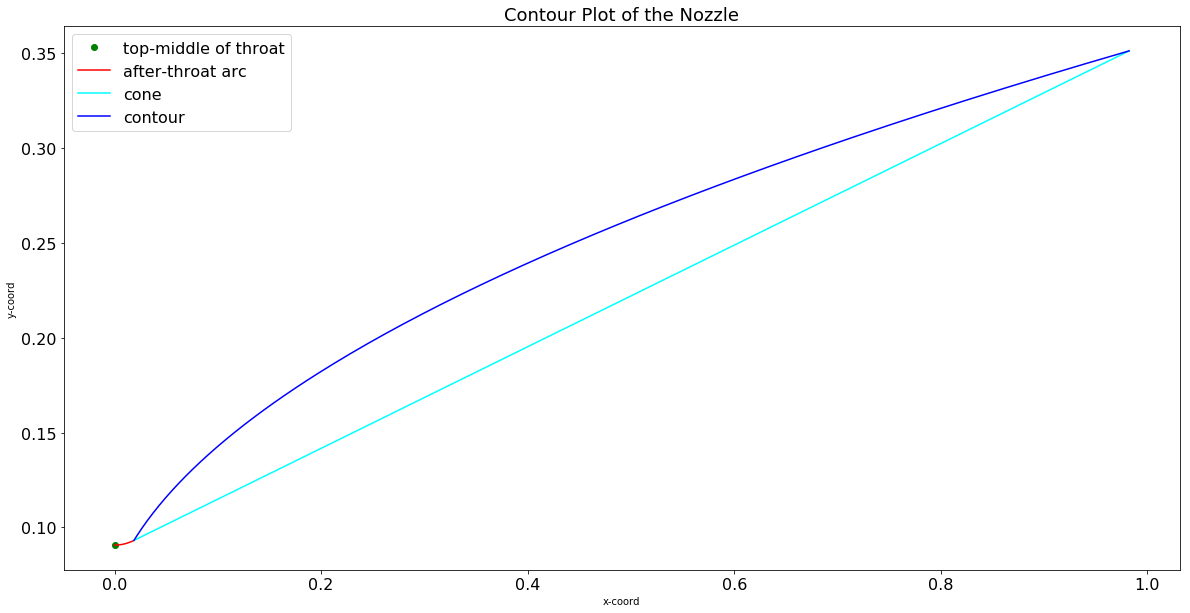

In [32]:
####### CONTOUR PLOT ########
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
#
plt.plot(0,r_t,'ro', color='green',label='top-middle of throat')
plt.plot(wtdX, wtdY, '-', color='red', label='after-throat arc')
plt.plot([wtdX[-1],noz_x],[wtdY[-1],r_e],'-',color='cyan', label='cone')
#
#plt.plot(nozConX,nozConY,'-', color='purple')
#plt.plot([item[0] for item in nozConXY],[item[1] for item in nozConXY],'-',color='purple')
plt.plot([item[0] for item in nozXYRot],[item[1] for item in nozXYRot],'-',color = 'blue',label = 'contour')
#
plt.title('Contour Plot of the Nozzle', fontsize=18)
#plt.xlim(0,0.05)
#plt.ylim(0,0.1)
plt.xlabel('x-coord')
plt.ylabel('y-coord')
plt.legend(loc=2, fontsize=16)
#
#plt.savefig('figure')
#
plt.show()
plt.close()

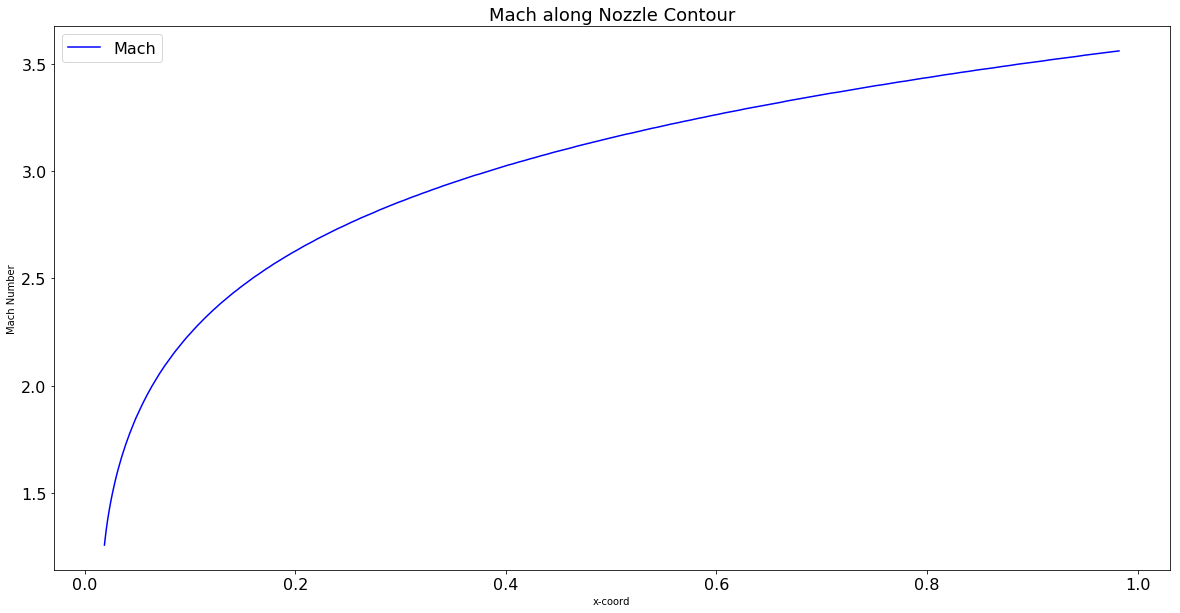

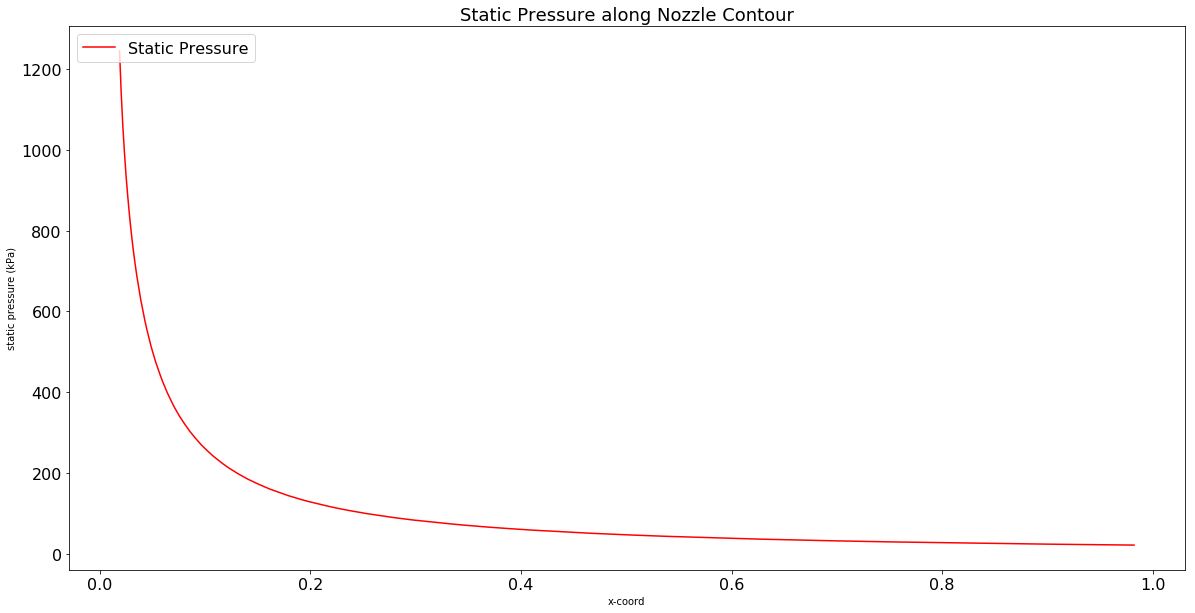

Exit static Pressure: 22.08 kPa


In [35]:
####### MACH/PRESSURE PLOT ########
## Finding values for area, mach, and static pressure
nozzle = []
for i in range(len(nozXYRot)+1):
    if i == 0:
        continue
    nozzle.append([nozXYRot[-i][0],nozXYRot[-i][1]])
    
nozArea = [np.pi * item[1]**2 for item in nozzle]
nozMach = [findMachSup(item/A_t) for item in nozArea]
nozP = [statPres(P_c, item) for item in nozMach]

#print(nozXYRot)

## Graphing time! MACH
plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
#
plt.plot([item[0] for item in nozzle],nozMach,'-', color='blue',label="Mach")
#
plt.title('Mach along Nozzle Contour',fontsize=18)
#plt.xlim(0,.2)
plt.xlabel("x-coord")
plt.ylabel("Mach Number")
plt.legend(loc=2,fontsize=16)
#
#plt.savefig('machPres')
#
plt.show()
plt.close()

## Graphing time! PRESSURE
plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
#
plt.plot([item[0] for item in nozzle],nozP, '-', color='red', label="Static Pressure")
#
plt.title('Static Pressure along Nozzle Contour',fontsize=18)
#plt.xlim(0,.2)
plt.xlabel("x-coord")
plt.ylabel("static pressure (kPa)")
plt.legend(loc=2,fontsize=16)
#
#plt.savefig('machPres')
#
plt.show()
plt.close()
print("Exit static Pressure: " + str(rounds(nozP[-1])) + " kPa")

### Part A

For this part, we will use the exit static pressure as found from the above analysis as our $P_e$. We will then run through the desired $\varepsilon$ values to plot our results. The equation we use to do this is:

$$ c_f = \left[\frac{2\gamma^2}{\gamma-1}\left(\frac{2}{\gamma+1}\right)^\frac{\gamma+1}{\gamma-1}(1-(p_e/p_c)^{(\gamma-1)/\gamma})\right]^{1/2} + \left(p_e/p_c - p_a/p_c\right)\varepsilon$$

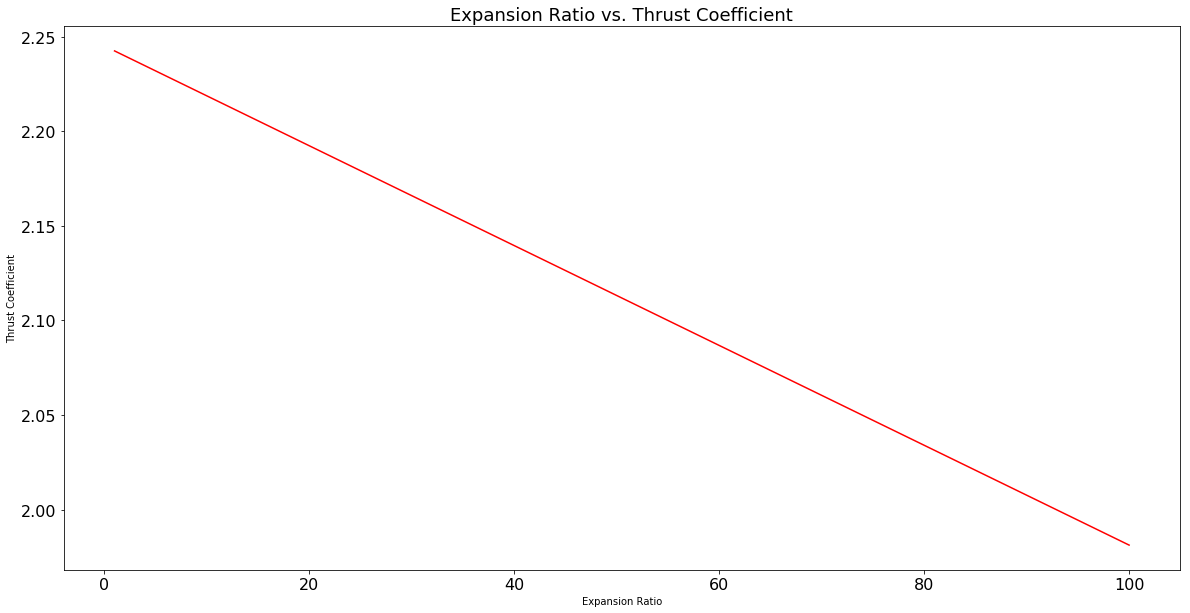

In [10]:
PcPa = 100
P_e = nozP[-1]
linEps = np.linspace(1,100,200)
linC_f = [(((2*gamma**2)/(gamma-1)) * ((2)/(gamma+1))**((gamma+1)/(gamma-1))
          * (1-(P_e/P_c))**((gamma-1)/gamma)
         )**(1/2) + (P_e/P_c - PcPa**(-1))*item
          for item in linEps]

## Graphing time! EPSILON
plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
#
plt.plot(linEps,linC_f, '-', color='red')
#
plt.title('Expansion Ratio vs. Thrust Coefficient',fontsize=18)
#plt.xlim(0,.2)
plt.xlabel("Expansion Ratio")
plt.ylabel("Thrust Coefficient")
#plt.legend(loc=2,fontsize=16)
#
#plt.savefig('machPres')
#
plt.show()
plt.close()

### Part B

For this part, we first to find is the range of $P_a$ that are greaterthan the $P_e$ we found during our contour analysis. Ambient pressure is thusly any value larger than 22.08 kPa.
Values smaller than this will lead to a normal shock outside of the nozzle

In [27]:
## For epsilon = 5
PePc = 0.0319051
P_e = P_c * PePc
print("Exit pressure, with the given chamber pressure:\n" + str(rounds(P_e)))

Exit pressure, with the given chamber pressure:
95.715


Thus, our ambient pressures are on the interval
\[ 95.715, 101.325 \] kPa

### Part C

From the code below, we find that the location of the normal shock at sea level would be:
$$x_{separation} = 0.111 \text{ meters from the throat}$$

In [29]:
P_a = 101.325 #kPa
#Use same Pc value as beginning of problem
P_sep = P_a * (2./3.)*(P_c/P_a)**(-0.2)
print("Separation Pressure: " + str(rounds(P_sep)))

## Find closest x-val to this pressure
pDiff = [np.abs(item - P_sep) for item in nozP]
minIndex = pDiff.index(min(pDiff))
sepX = nozXYRot[minIndex][0]
print("X-coord of separation at sea level: " 
      + str(rounds(sepX)))

Separation Pressure: 34.304
X-coord of separation at sea level: 0.111


## Problem 5

In [55]:
#### PART A ####
mass = 250 #lbs
eps = 30
gamma = 1.2
Pe = 0.33333 * 6.75 #psi
machExpanded = float('%.3f'% (findMachSup(30) * 1000/1000))
Pc = totalPres(Pe,machExpanded)
print("Chamber Pressure:")
print(Pc)

#### PART B ####
g_alt = 32.112 #ft/s
c_fv = 1.85928
cStar = 5000 #ft/s
A_t = np.pi #sq in
P_alt = 6.75 #psi
mDot_alt = (g_alt*Pc*A_t)/cStar
c_f = c_fv - (P_alt/Pc)*eps
F_alt = c_f*Pc*A_t
burnTimeA = mass/mDot_alt
print("At 20000 feet:")
print(F_alt)
print(burnTimeA)

#### PART C ####
g_sea = 32.174
P_sea = 14.7 #psi
mDot_sea = (g_sea*Pc*A_t)/cStar
c_fs = c_fv - (P_sea/Pc)*eps
F_sea = c_fs*Pc*A_t
burnTimeS = mass/mDot_sea
print("sea level:")
print(F_sea)
print(burnTimeS)

Chamber Pressure:
748.2588898369859
At 20000 feet:
3734.4827801224747
16.55925903801642
sea level:
2985.212932241309
16.52734898454601
